In [ ]:
import pandas as pd
df=pd.read_csv('framingham.csv')
df.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
# prompt: check for mising values

print(X.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
dtype: int64


In [ ]:
# logistic regression to predict CHD using different predictors  and check model performance using difference performance measures from confusion matrix

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y = df['ASA level']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Primigravida'

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate model performance using confusion matrix and other metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Confusion Matrix:
[[716   8]
 [116   8]]

Accuracy: 0.8537735849056604
Precision: 0.5
Recall: 0.06451612903225806
F1-score: 0.11428571428571428


In [ ]:
import pandas as pd
# Create a DataFrame for the confusion matrix for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

print("\nConfusion Matrix Table:")
print(conf_matrix_df)


Confusion Matrix Table:
                 Predicted Negative  Predicted Positive
Actual Negative                 716                   8
Actual Positive                 116                   8


In [ ]:
# table of confusion matrix and interpret the measures
print("\nInterpretation of Measures:")
print("Confusion Matrix:")
print("- True Positive (TP):", conf_matrix[1, 1], "(Correctly predicted positive cases - CHD)")
print("- True Negative (TN):", conf_matrix[0, 0], "(Correctly predicted negative cases - no CHD)")
print("- False Positive (FP):", conf_matrix[0, 1], "(Incorrectly predicted positive cases - predicted CHD but no CHD)")
print("- False Negative (FN):", conf_matrix[1, 0], "(Incorrectly predicted negative cases - predicted no CHD but had CHD)")


Interpretation of Measures:
Confusion Matrix:
- True Positive (TP): 8 (Correctly predicted positive cases - CHD)
- True Negative (TN): 716 (Correctly predicted negative cases - no CHD)
- False Positive (FP): 8 (Incorrectly predicted positive cases - predicted CHD but no CHD)
- False Negative (FN): 116 (Incorrectly predicted negative cases - predicted no CHD but had CHD)


In [ ]:
##Accuracy
print("\nAccuracy:")
print("- Accuracy measures the overall correctness of the model. It is the ratio of correctly predicted instances (TP + TN) to the total number of instances.")
print(f"- Accuracy: {accuracy:.4f}")


Accuracy:
- Accuracy measures the overall correctness of the model. It is the ratio of correctly predicted instances (TP + TN) to the total number of instances.
- Accuracy: 0.8538


In [ ]:
##Precision

print("\nPrecision:")
print("- Precision is the ability of the model to avoid predicting a positive outcome when the actual outcome is negative. It is the ratio of true positives to the total predicted positives (TP + FP).")
print("  It is a measure of the reliability of a positive prediction.")
print(f"- Precision: {precision:.4f}")


Precision:
- Precision is the ability of the model to avoid predicting a positive outcome when the actual outcome is negative. It is the ratio of true positives to the total predicted positives (TP + FP).
  It is a measure of the reliability of a positive prediction.
- Precision: 0.5000


In [ ]:
###Sensitivity or True Positive Rate
print("\nRecall (Sensitivity or True Positive Rate):")
print("- Recall is the ability of the model to find all the positive instances. It is the ratio of true positives to the total actual positives (TP + FN).")
print("  It is a measure of how many of the actual positive cases were correctly identified.")
print(f"- Recall: {recall:.4f}")


Recall (Sensitivity or True Positive Rate):
- Recall is the ability of the model to find all the positive instances. It is the ratio of true positives to the total actual positives (TP + FN).
  It is a measure of how many of the actual positive cases were correctly identified.
- Recall: 0.0645


In [ ]:
##F-1 Score
print("\nF1-score:")
print("- The F1-score is the harmonic mean of Precision and Recall. It provides a single score that balances both concerns.")
print("  It is particularly useful when you have an uneven class distribution.")
print(f"- F1-score: {f1:.4f}")



F1-score:
- The F1-score is the harmonic mean of Precision and Recall. It provides a single score that balances both concerns.
  It is particularly useful when you have an uneven class distribution.
- F1-score: 0.1143


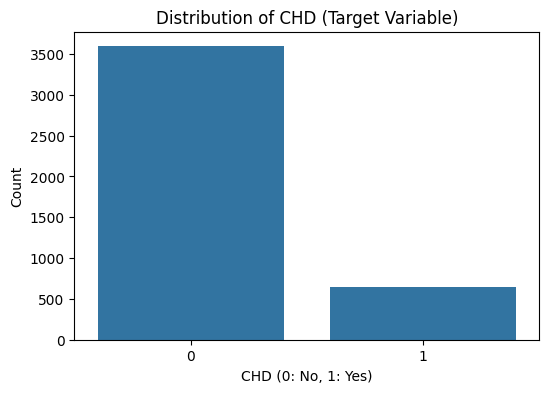

In [ ]:
# Visual Display

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable 'stroke'
plt.figure(figsize=(6, 4))
sns.countplot(x='TenYearCHD', data=df)
plt.title('Distribution of CHD (Target Variable)')
plt.xlabel('CHD (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

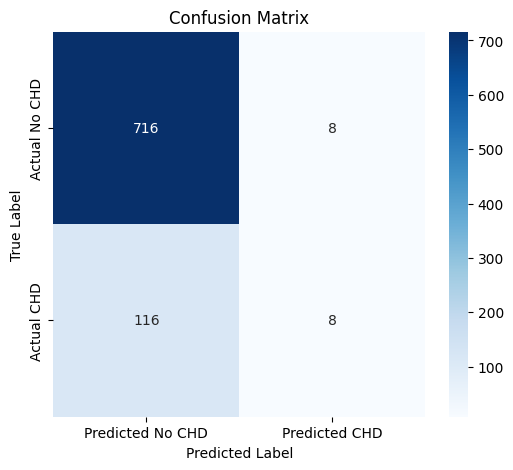

In [ ]:

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No CHD', 'Predicted CHD'], yticklabels=['Actual No CHD', 'Actual CHD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


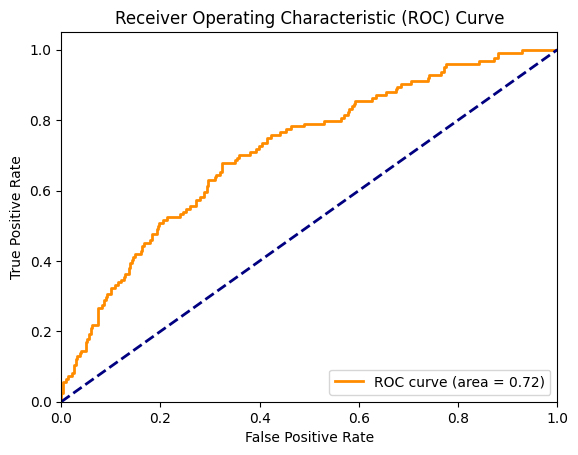

In [ ]:
# prompt: AUC curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

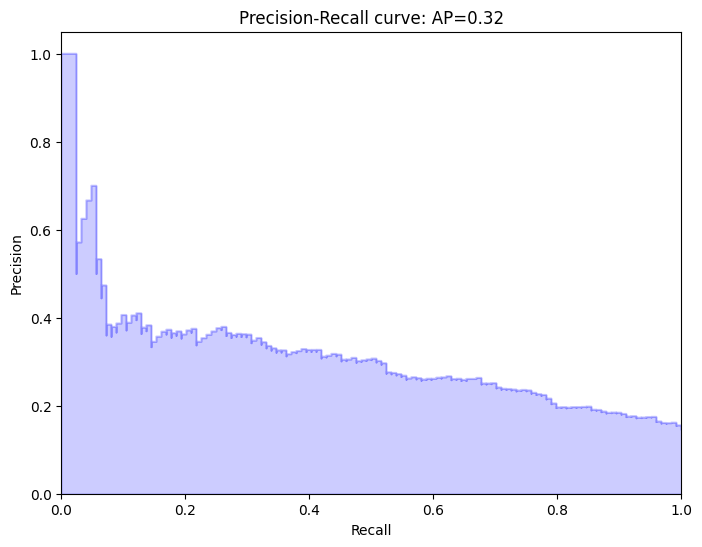


Interpretation of the Precision-Recall Curve:
- In this case, the Average Precision (AP) is 0.32.
- A higher AP value suggests that the model performs well at distinguishing between the positive and negative classes across different thresholds.


In [ ]:
# prompt: Precision recall curve with interpretation

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Get probability predictions for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and area
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()

print("\nInterpretation of the Precision-Recall Curve:")
print(f"- In this case, the Average Precision (AP) is {average_precision:.2f}.")
print("- A higher AP value suggests that the model performs well at distinguishing between the positive and negative classes across different thresholds.")